In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import squarify
import seaborn as sns

## Processing & Filering the Dataset

### Course Dataset 

In [2]:
course_dataset = pd.read_csv("Master_dataset_Feb22.csv", encoding= 'unicode_escape')
print(course_dataset.shape) #dataset contains 10000 courses with 5 columns each
course_dataset.head()

(10000, 5)


,Sr,Degree 1,Degree 1 SpeCializations,Campus,Key Skills
0,1001,B E,Mechanical,MITCOE,CATIA
1,1002,B E,Mechanical,MITCOE,CATIA
2,1003,B E,Mechanical,MITAOE,CATIA
3,1004,B E,Mechanical,MITCOE,CATIA
4,1005,B E,Mechanical,MITCOE,CATIA


In [3]:
#check for null values 
course_dataset.isnull().sum() #there are no missing values

Sr                          0
Degree 1                    0
Degree 1 SpeCializations    0
Campus                      0
Key Skills                  0
dtype: int64

### Analysing the dataset

course_info has 6 columns names id, course_id, start, end, course_type and category.

**id**: the id number of the course

**course_id**: the id string

**start**: course start time

**end**: course end time

**course_type**: course mode (0: instructor-paced course, 1: self-paced course)

**category**: the category of course.

In [4]:
course_dataset["Degree 1"].value_counts() #5877 courses are instructor paced and 533 are self-paced

B E        9115
M TeCh      885
Name: Degree 1, dtype: int64

In [5]:
course_dataset["Degree 1 SpeCializations"].value_counts()

Mechanical                                    3928
Electronics  Telecommunication Engineering    3280
Computer Science  Engineering                 2208
Civil Engineering                              584
Name: Degree 1 SpeCializations, dtype: int64

In [6]:
course_dataset["Campus"].value_counts()

MITCOE      4935
MITAOE      3323
MIT  WPU     885
MIT,Pune     857
Name: Campus, dtype: int64

In [7]:
course_dataset["Key Skills"].value_counts()

C, Java, CPP, HTML, CMStool, MYSQL                                                                                                                        1548
AutoCAD, PROE                                                                                                                                             1025
SOLIDWORKS, AUTOCAD, CREO                                                                                                                                  771
CAD,CAM                                                                                                                                                    652
MSCIT, Leadership, AUTOCAD                                                                                                                                 584
AmazonWebServiCes, C CPP, Arduino, MongoDB, Linux, Golang,Microcontrollers, Gobot, InternetofThings, MATLAB, SQL, PHP                                      574
ProE,CATIA                                    

### User Dataset

In [8]:
user_dataset = pd.read_csv("User_profiles.csv", encoding= 'unicode_escape')
print(user_dataset.shape) #dataset contains 1042 users with 6 columns each
user_dataset.head()

(1042, 6)


,Userid,Degree 1,Degree 1 Specializations,Known Languages,Key Skills,Career Objective
0,1001,B.E.,Computer Science & Engineering,"English, Marathi, Hindi",C; Java; Keras; Flask; Deep Learning; Selenium...,Computer Engineering student with good technic...
1,1002,B.E.,Computer Science & Engineering,Hindi English,Java; Neural Networks; AI; Python; Html5; CPP,Interested in working under company offering A...
2,1003,B.E.,Computer Science & Engineering,NaN,NaN,NaN
3,1004,B.E.,Computer Science & Engineering,"English, Hindi, Marathi, Marwari",XML; C; Java; Data Structures; Python; MongoDB...,Currently a final year student of Computer Eng...
4,1005,B.E.,Computer Science & Engineering,"English,Hindi ,Kashmiri , Urdu",XML; Word; Data Structures; Communication; GUI...,To have a growth oriented and challenging care...


In [9]:
#check for null values 
user_dataset.isnull().sum() #there are some missing values in the known languages, key skills and career objectives data

Userid                        0
Degree 1                      0
Degree 1 Specializations      0
Known Languages             139
Key Skills                  396
Career Objective            575
dtype: int64

### Analysing the dataset

User_profiles has 6 columns names usesr_id, gender, education and birth date.

**Userid**: the id of user

**Degree 1**:the degree of user

**Degree 1 Specializations**: specializations of the user

**Known Languages**: languages understood by user

**Key Skills**: key skills of the user

**Career Objective**: career objective of the user

In [10]:
user_dataset["Degree 1"].value_counts()

B.E.    1042
Name: Degree 1, dtype: int64

In [11]:
user_dataset["Degree 1 Specializations"].value_counts()

Computer Science & Engineering    1042
Name: Degree 1 Specializations, dtype: int64

In [12]:
user_dataset["Known Languages"].value_counts()

Java,CPP                             74
English, Hindi, Marathi              61
C,CPP                                32
C,CPP,Java,Python                    27
English, Marathi, Hindi              23
                                     ..
Java,Linux                            1
Marathi, English, Hindi,Sanskrit      1
Marathi \nEnglish\nHindi              1
English ,Hindi, Marathi               1
English, Hindi, Marathi, Gujarati     1
Name: Known Languages, Length: 251, dtype: int64

In [13]:
user_dataset["Key Skills"].value_counts()

C-Programming; MYSQL; CSS                                                   8
Cpp, Java                                                                   5
C; Java; cpp; MySQL                                                         4
cpp; MySQL                                                                  4
marketing-skill; event-management; presentation-skill                       3
                                                                           ..
JDBC; Java; NetBeans; Excel; HTML; MySQL                                    1
Python; Bootstrap; HTML; Core Java; SQL; CPP; PHP; CSS                      1
cpp; Html,css,java                                                          1
XML; C; Java; Advanced Java; JScript; Mysq; HTML; CPP; Android; PHP; CSS    1
Computer-hardware-assembly; Python; computer-hardware-installation          1
Name: Key Skills, Length: 520, dtype: int64

In [14]:
user_dataset["Career Objective"].value_counts()

To secure a position where I can efficiently contribute my skills and abilities to the growth of the organization and build my professional career.                                                                                          7
To pursue a challenging career and be a part of progressive organization that gives a scope to enhance my knowledge and utilizing my skills towards the growth of the organization.                                                          5
Looking for a challenging role in a reputable organization to utilize my technical, database, and management skills for the growth of the organization as well as to enhance my knowledge about new and emerging trends in the IT sector.    4
Computer Engineering student with good technical skills and problem solving abilities. Areas of interest include Computer Vision, Deep Learning, Machine Learning, and Research.                                                             3
Secure a responsible career opportunity to f

### User Ratings

In [15]:
user_ratings = pd.read_csv("User_ratings2.csv", encoding= 'unicode_escape') #this is a matrix of user ratings and course id
print(user_ratings.shape) #dataset contains 424 user ratings of 21 courses
user_ratings.head()

(424, 21)


,Unnamed: 0,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020
0,2001,5,3,1,0,2,1,0,0,0,...,3,0,0,4,1,0,2,0,1,3
1,2002,3,5,0,2,1,0,4,5,0,...,0,3,2,0,5,2,0,3,0,0
2,2003,4,1,3,0,2,3,1,4,5,...,1,0,3,2,4,2,3,4,3,4
3,2004,2,4,5,3,3,2,0,4,2,...,4,3,5,2,3,1,3,2,3,0
4,2005,0,4,2,0,1,2,4,3,3,...,1,2,3,0,5,0,0,0,2,1


In [16]:
user_ratings.mean() #these averages are correct (checked manually)

Unnamed: 0    2212.500000
1001             2.429245
1002             2.775943
1003             2.662736
1004             2.872642
1005             2.594340
1006             2.860849
1007             3.386792
1008             3.009434
1009             2.391509
1010             2.285377
1011             2.179245
1012             2.143868
1013             2.391509
1014             2.356132
1015             2.915094
1016             2.952830
1017             2.584906
1018             1.889151
1019             2.341981
1020             2.870283
dtype: float64

### Data Pre-Processing

In [17]:
#cleaning the dataset by lowercasing and changing spaces to _
def clean_col_names(df, columns):
    new = []
    for c in columns:
        new.append(c.lower().replace(' ','_'))

    return new

#splitting 
def split_lang(x):
    return (x.split(','))

def split_skills(x):
    return (x.split(';'))

def rem_space(x):
    return (x.split(' '))

In [18]:
course_dataset.columns = clean_col_names(course_dataset, course_dataset.columns)
course_dataset.head()

,sr_,degree_1,degree_1_specializations,campus,key_skills
0,1001,B E,Mechanical,MITCOE,CATIA
1,1002,B E,Mechanical,MITCOE,CATIA
2,1003,B E,Mechanical,MITAOE,CATIA
3,1004,B E,Mechanical,MITCOE,CATIA
4,1005,B E,Mechanical,MITCOE,CATIA


In [19]:
#changing B E to B.E. to be same as user dataset
course_dataset["degree_1"] = course_dataset["degree_1"].replace("B E ","B.E.")
course_dataset.head() 

,sr_,degree_1,degree_1_specializations,campus,key_skills
0,1001,B.E.,Mechanical,MITCOE,CATIA
1,1002,B.E.,Mechanical,MITCOE,CATIA
2,1003,B.E.,Mechanical,MITAOE,CATIA
3,1004,B.E.,Mechanical,MITCOE,CATIA
4,1005,B.E.,Mechanical,MITCOE,CATIA


In [20]:
user_dataset.columns = clean_col_names(user_dataset, user_dataset.columns)
user_dataset.head()

,userid,degree_1,degree_1_specializations,known_languages,key_skills,career_objective
0,1001,B.E.,Computer Science & Engineering,"English, Marathi, Hindi",C; Java; Keras; Flask; Deep Learning; Selenium...,Computer Engineering student with good technic...
1,1002,B.E.,Computer Science & Engineering,Hindi English,Java; Neural Networks; AI; Python; Html5; CPP,Interested in working under company offering A...
2,1003,B.E.,Computer Science & Engineering,NaN,NaN,NaN
3,1004,B.E.,Computer Science & Engineering,"English, Hindi, Marathi, Marwari",XML; C; Java; Data Structures; Python; MongoDB...,Currently a final year student of Computer Eng...
4,1005,B.E.,Computer Science & Engineering,"English,Hindi ,Kashmiri , Urdu",XML; Word; Data Structures; Communication; GUI...,To have a growth oriented and challenging care...


In [21]:
#filling missing values as Missing
user_dataset["known_languages"] = user_dataset["known_languages"].fillna("Missing")
user_dataset["key_skills"] = user_dataset["key_skills"].fillna("Missing")
user_dataset["career_objective"] = user_dataset["career_objective"].fillna("Missing")

In [22]:
#for course dataset
#course_dataset['degree_1'] = course_dataset['degree_1'].apply(rem_space) #tried to change B E to B.E. 
course_dataset['key_skills'] = course_dataset['key_skills'].apply(split_skills)

#for user dataset
user_dataset['known_languages'] = user_dataset['known_languages'].apply(split_lang)
user_dataset['key_skills'] = user_dataset['key_skills'].apply(split_skills)


In [23]:
#For Clustering
course_dataset['key_skills_str'] = course_dataset.key_skills.apply(lambda x: ', '.join([str(i) for i in x]))
user_dataset['key_skills_str'] = user_dataset.key_skills.apply(lambda x: ', '.join([str(i) for i in x]))

In [24]:
course_dataset

,sr_,degree_1,degree_1_specializations,campus,key_skills,key_skills_str
0,1001,B.E.,Mechanical,MITCOE,[CATIA],CATIA
1,1002,B.E.,Mechanical,MITCOE,[CATIA],CATIA
2,1003,B.E.,Mechanical,MITAOE,[CATIA],CATIA
3,1004,B.E.,Mechanical,MITCOE,[CATIA],CATIA
4,1005,B.E.,Mechanical,MITCOE,[CATIA],CATIA
...,...,...,...,...,...,...
9995,10996,B.E.,Electronics Telecommunication Engineering,MITCOE,"[EmbeddedC, MATLAB, Cprogramming, Keil]","EmbeddedC, MATLAB, Cprogramming, Keil"
9996,10997,B.E.,Electronics Telecommunication Engineering,"MIT,Pune","[EmbeddedC, MATLAB, Cprogramming, Keil]","EmbeddedC, MATLAB, Cprogramming, Keil"
9997,10998,M TeCh,Electronics Telecommunication Engineering,MIT WPU,"[EmbeddedC, MATLAB, Cprogramming, Keil]","EmbeddedC, MATLAB, Cprogramming, Keil"
9998,10999,B.E.,Electronics Telecommunication Engineering,MITAOE,"[AmazonWebServiCes, C CPP, Arduino, MongoDB, L...","AmazonWebServiCes, C CPP, Arduino, MongoDB, Li..."


In [25]:
user_dataset.head()

,userid,degree_1,degree_1_specializations,known_languages,key_skills,career_objective,key_skills_str
0,1001,B.E.,Computer Science & Engineering,"[English, Marathi, Hindi]","[C, Java, Keras, Flask, Deep Learning, Se...",Computer Engineering student with good technic...,"C, Java, Keras, Flask, Deep Learning, Sel..."
1,1002,B.E.,Computer Science & Engineering,[Hindi English],"[Java, Neural Networks, AI, Python, Html5,...",Interested in working under company offering A...,"Java, Neural Networks, AI, Python, Html5, ..."
2,1003,B.E.,Computer Science & Engineering,[Missing],[Missing],Missing,Missing
3,1004,B.E.,Computer Science & Engineering,"[English, Hindi, Marathi, Marwari]","[XML, C, Java, Data Structures, Python, M...",Currently a final year student of Computer Eng...,"XML, C, Java, Data Structures, Python, Mo..."
4,1005,B.E.,Computer Science & Engineering,"[English, Hindi , Kashmiri , Urdu]","[XML, Word, Data Structures, Communication,...",To have a growth oriented and challenging care...,"XML, Word, Data Structures, Communication, ..."


In [26]:
#store data in folder data
course_dataset.to_csv ("data/courseData.csv", index = True)
user_dataset.to_csv ("data/userData.csv", index = True)

## Clustering Technique

### Course Dataset - Key Skills

In [27]:
def get_common_words(model, count_words):
    count_words_new=count_words*(-1)-1
    common_words = model.cluster_centers_.argsort()[:,-1:count_words_new:-1]
    return common_words
      
def tokenize(text):
    stemmer=SnowballStemmer('english')
    return [stemmer.stem(word) for word in word_tokenize(text.lower())]

In [28]:
vectorizer= TfidfVectorizer(stop_words=set([","]),tokenizer=tokenize, max_features=1000)
X=vectorizer.fit_transform(course_dataset["key_skills_str"])
print(X.shape)
word_features = vectorizer.get_feature_names()
print(word_features)
print(len(word_features))
print(word_features[54])

(10000, 62)
['amazonwebservic', 'android', 'arduino', 'arm7', 'autocad', 'bas', 'basicsofembeddedcpython', 'c', 'cad', 'cam', 'catia', 'caticpp', 'cmstool', 'coe', 'core', 'cpp', 'cppprogram', 'cprogram', 'creo', 'css', 'design', 'eagl', 'edatoolmentorgraph', 'embed', 'embeddedc', 'embeddedcpython', 'gobot', 'golang', 'goodorganizingskil', 'html', 'internetofth', 'internetofthiltisem', 'java', 'javangskil', 'javascript', 'keil', 'laravel', 'leadership', 'linux', 'loratechnolog', 'loratformwindowsandunix', 'mathematicaltoolmatlab', 'matlab', 'microcontrol', 'microsoftoffic', 'mongodb', 'mscit', 'mysql', 'p', 'pcb', 'php', 'phpframework', 'platformwindowsandunix', 'proe', 'programminglanguageccpp', 'pspice', 'python', 'simulationsoftwareproteusmultisem', 'solidwork', 'sql', 'vhdl', 'window']
62
programminglanguageccpp


In [29]:
kmeans = KMeans(n_clusters = 15, n_init = 10, random_state=1234)
kmeans.fit(X)

KMeans(n_clusters=15, random_state=1234)

In [30]:
common_words=get_common_words(kmeans, 10)
print(common_words)

[[12 29 47 15 32  7 11 48 39 53]
 [10 53 61 15 27 26 25 24 23 22]
 [ 4 61 15 28 27 26 25 24 23 22]
 [53  4 61 15 27 26 25 24 23 22]
 [ 8  9 61 16 28 27 26 25 24 23]
 [58 18  4 61 15 27 26 25 24 23]
 [24 42 35 17  7 33 47 12 20 18]
 [26 27 43 30 45  2 38  0 59 50]
 [20 49  7 61 15 27 26 25 24 23]
 [44 57 21 54 28 42 47 14 26 25]
 [37 46  4 61 17 18 19 20 21 22]
 [61 56 39 22  3 55 60 52 41  6]
 [16 14 17 47 32 15 27 26 25 24]
 [32  7 56 61 42 47 25 26 24 23]
 [34 51 36  1 19 50 29 15 32  7]]


In [31]:
cluster_words = []
all_clusters = []
cnt = 0

for i in common_words:
    for j in i:
        cluster_words.append(word_features[j])
        cnt=cnt+1
        if cnt == len(i):
            all_clusters.append(cluster_words)
            cluster_words=[]
            cnt = 0

In [32]:
print("Common words in Each Cluster")
index = 0
for i in all_clusters:
    print("Cluster ", index, "- ", " ".join(i))
    index=index+1

Common words in Each Cluster
Cluster  0 -  cmstool html mysql cpp java c caticpp p loratechnolog proe
Cluster  1 -  catia proe window cpp golang gobot embeddedcpython embeddedc embed edatoolmentorgraph
Cluster  2 -  autocad window cpp goodorganizingskil golang gobot embeddedcpython embeddedc embed edatoolmentorgraph
Cluster  3 -  proe autocad window cpp golang gobot embeddedcpython embeddedc embed edatoolmentorgraph
Cluster  4 -  cad cam window cppprogram goodorganizingskil golang gobot embeddedcpython embeddedc embed
Cluster  5 -  solidwork creo autocad window cpp golang gobot embeddedcpython embeddedc embed
Cluster  6 -  embeddedc matlab keil cprogram c javangskil mysql cmstool design creo
Cluster  7 -  gobot golang microcontrol internetofth mongodb arduino linux amazonwebservic sql php
Cluster  8 -  design pcb c window cpp golang gobot embeddedcpython embeddedc embed
Cluster  9 -  microsoftoffic simulationsoftwareproteusmultisem eagl programminglanguageccpp goodorganizingskil matlab

In [33]:
course_dataset['cluster']=kmeans.labels_

cluster  degree_1_specializations                  
0        Computer Science  Engineering                 1547
         Electronics  Telecommunication Engineering       2
         Mechanical                                       1
1        Mechanical                                    1054
2        Mechanical                                     425
3        Mechanical                                    1025
4        Mechanical                                     652
5        Mechanical                                     771
6        Computer Science  Engineering                    1
         Electronics  Telecommunication Engineering     904
7        Electronics  Telecommunication Engineering     578
8        Electronics  Telecommunication Engineering     495
9        Electronics  Telecommunication Engineering     467
10       Civil Engineering                              584
11       Electronics  Telecommunication Engineering     385
12       Computer Science  Engineering          

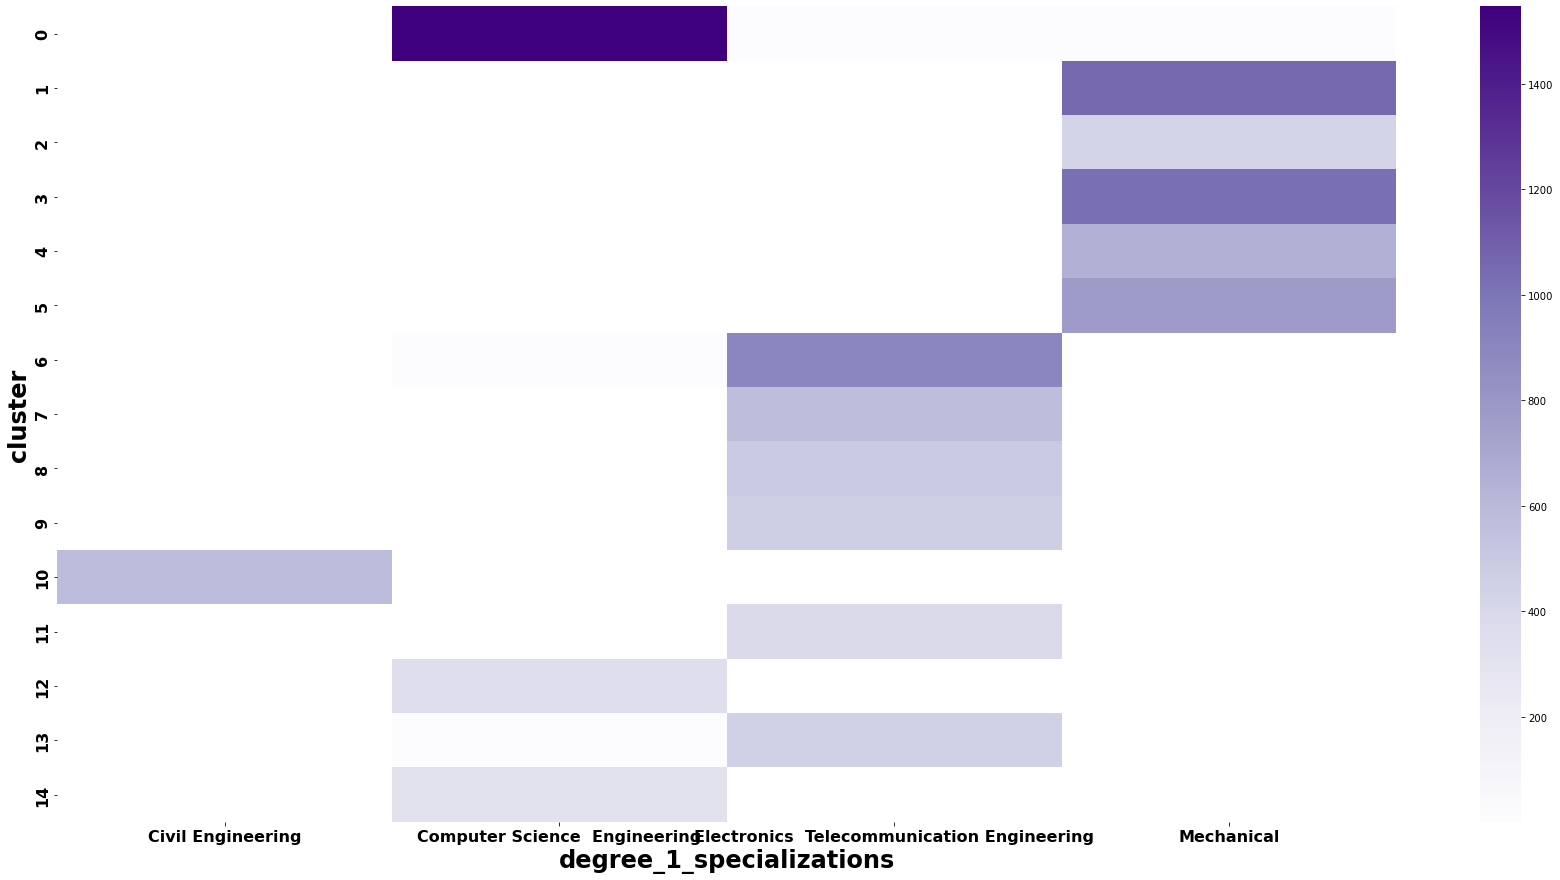

In [34]:
clusters = course_dataset.groupby(["cluster", "degree_1_specializations"]).size()
print(clusters)
fig, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'degree_1_specializations'), ax = ax, cmap = "Purples")
ax.set_xlabel('degree_1_specializations', fontdict = {'weight': 'bold', 'size': 24})
ax.set_ylabel("cluster", fontdict = {'weight': 'bold', 'size': 24})
for label in ax.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")  


In [35]:
#https://github.com/adrij/Udemy-recommender-system/blob/master/4_Clustering_and_RS.ipynb
#also uses elbow method to:
#I investigated the relationship between the number of clusters and the inertia (within-cluster sum-of-squares ) to find 
#to optimal number of clusters. According to the elbow method, the line is an arm and the "elbow" on the arm is the 
#value of k that is the best.

#### Trying different k values 

In [36]:
#k_cluster_range is the values of k we will loop through (from 1 to 30 seems common)
k_cluster_range = range(1,30)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234).fit(X)
    inertia[i] = kmeans.inertia_

Text(6, 7700, "Let's try k=6")

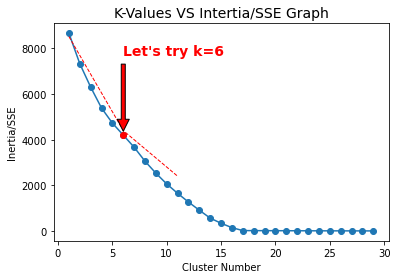

In [37]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
#save the plot
#plt.savefig('elbow_method.png')

#plotting the red line and arrow
plt.plot([6], [inertia[5]], 'o--', color='red')
plt.plot([1,6,11], [8520, 4400,2400], '--', color='red', linewidth=1)
plt.annotate("Let's try k=6", xy=(6, inertia[5]), xytext=(6,7700),
             size=14, weight='bold', color='red',
             arrowprops=dict(facecolor='red', shrink=0.05))

Explained variance is 0.3122.


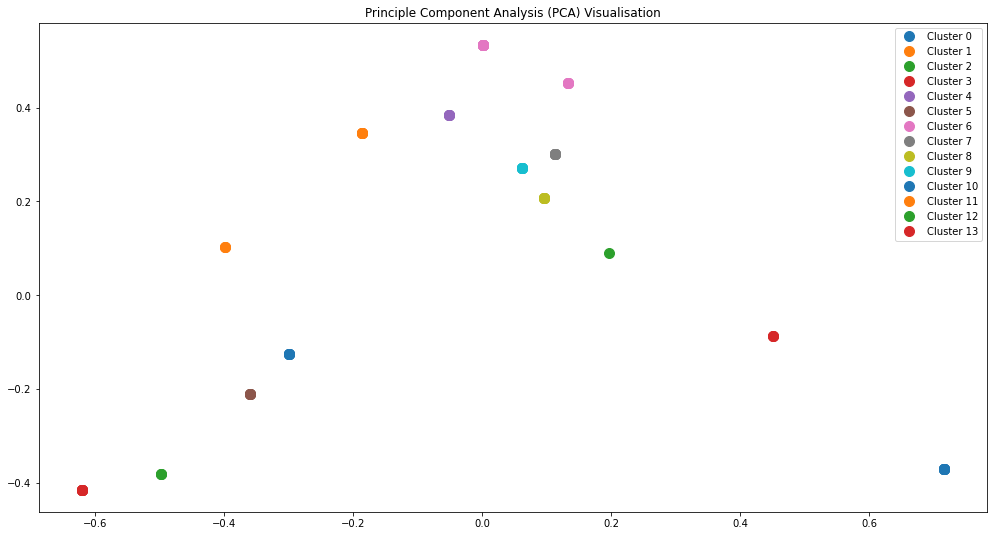

In [38]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=course_dataset['cluster'])) 
df_sample=df.sample(100)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()

### Course Dataset - Degree1, Degree1 Specializations & Key Skills

In [39]:
comb_frame = course_dataset.degree_1.str.cat(" " + course_dataset.degree_1_specializations.str.cat(" " + course_dataset.key_skills_str))
comb_frame = comb_frame.replace({"[^A-Za-z0-9 ]+": ""}, regex=True)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comb_frame)
X.shape #(10,000 x 69)

(10000, 69)

In [40]:
#other clustering 
#elbow method from https://github.com/ashishrana160796/online-course-recommendation-system/blob/master/elbow_test.py
k_cluster_range = range(1,31)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234, max_iter=100).fit(X)
    comb_frame["clusters"] = kmeans.labels_
    inertia[i] = kmeans.inertia_

Text(0.5, 1.0, 'K-Values VS Intertia/SSE Graph')

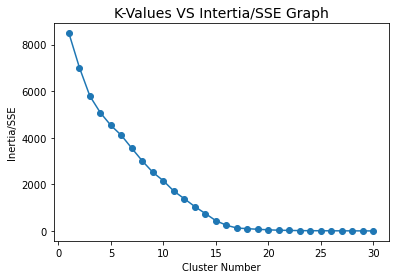

In [41]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
#save the plot
#plt.savefig('elbow_method.png')

In [42]:
newdf = pd.DataFrame(comb_frame)
newdf

,degree_1
0,BE Mechanical CATIA
1,BE Mechanical CATIA
2,BE Mechanical CATIA
3,BE Mechanical CATIA
4,BE Mechanical CATIA
...,...
9996,BE Electronics Telecommunication Engineering ...
9997,M TeCh Electronics Telecommunication Enginee...
9998,BE Electronics Telecommunication Engineering ...
9999,BE Electronics Telecommunication Engineering ...


In [43]:
from sklearn.decomposition import PCA

Explained variance is 0.3457.


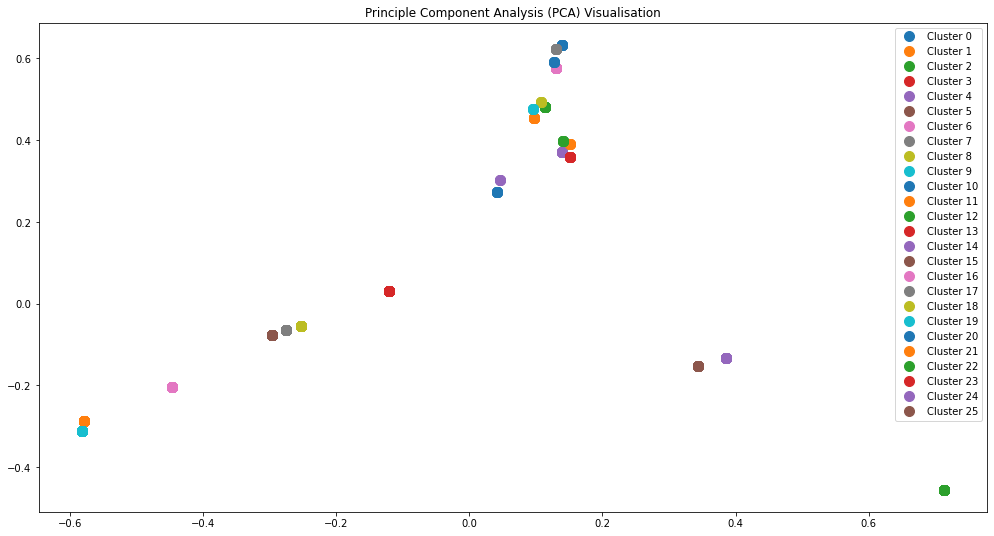

In [44]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=comb_frame["clusters"])) 
df_sample=df.sample(500)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()

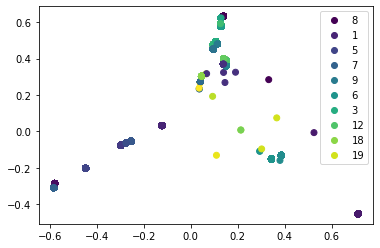

In [45]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())
df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=comb_frame["clusters"]))

plot = plt.scatter(df.x, df.y, c=df.label)
plt.legend(handles=plot.legend_elements()[0], labels=list(df["label"].unique()))
plt.show()

#### The two different clusters we made seem identical even though the first is based solely on key skills and the second is a combination of key skills, degree specialization and degree type 

### User Dataset -  Key Skills

In [46]:
vectorizer= TfidfVectorizer(stop_words=set([",", "--", "-", "#", "&", "-c-"]),tokenizer=tokenize, max_features=1000)
X=vectorizer.fit_transform(user_dataset["key_skills_str"])
print(X.shape)
word_features = vectorizer.get_feature_names()
#print(word_features)
print(len(word_features))
print(word_features[54])

(1042, 553)
553
analyt


In [47]:
kmeans = KMeans(n_clusters = 15, n_init = 10, random_state=1234)
kmeans.fit(X)
common_words=get_common_words(kmeans, 10)
#print(common_words)

In [48]:
cluster_words = []
all_clusters = []
cnt = 0

for i in common_words:
    for j in i:
        cluster_words.append(word_features[j])
        cnt=cnt+1
        if cnt == len(i):
            all_clusters.append(cluster_words)
            cluster_words=[]
            cnt = 0

print("Common words in Each Cluster")
index = 0
for i in all_clusters:
    print("Cluster ", index, "- ", " ".join(i))
    index=index+1

Common words in Each Cluster
Cluster  0 -  develop web android java cpp mysql firebas javascript c data
Cluster  1 -  miss yacc decision-mak designing-solid-work design descript deep-learn deep decisionmakingskil decis
Cluster  2 -  java cpp core c html dbms advanc oop mysql databas
Cluster  3 -  html python cpp css mysql java c data-structur computer-hardware-assembl machine-learn
Cluster  4 -  c-program mysql css cpp-program javascript java html htm data-structur bootstrap
Cluster  5 -  mysql cpp c java oop html basic-python use problem-solv android
Cluster  6 -  css javascript html cpp php mysql java android mongodb c
Cluster  7 -  excel linux skill jqueri powerpoint analyt c/cpp javascript creativ css
Cluster  8 -  sql html java cpp css c oop core-java python r
Cluster  9 -  ( ) basic moder cms css beginn java javascript dbms
Cluster  10 -  program object-ori databas java c mysql cpp html javascript android
Cluster  11 -  data structur analysi java cpp python c visual r mine
Cluste

In [49]:
user_dataset['cluster']=kmeans.labels_

cluster  degree_1_specializations      
0        Computer Science & Engineering     30
1        Computer Science & Engineering    396
2        Computer Science & Engineering     50
3        Computer Science & Engineering     72
4        Computer Science & Engineering     15
5        Computer Science & Engineering     53
6        Computer Science & Engineering     88
7        Computer Science & Engineering     12
8        Computer Science & Engineering     46
9        Computer Science & Engineering     18
10       Computer Science & Engineering     28
11       Computer Science & Engineering     63
12       Computer Science & Engineering     58
13       Computer Science & Engineering     95
14       Computer Science & Engineering     18
dtype: int64


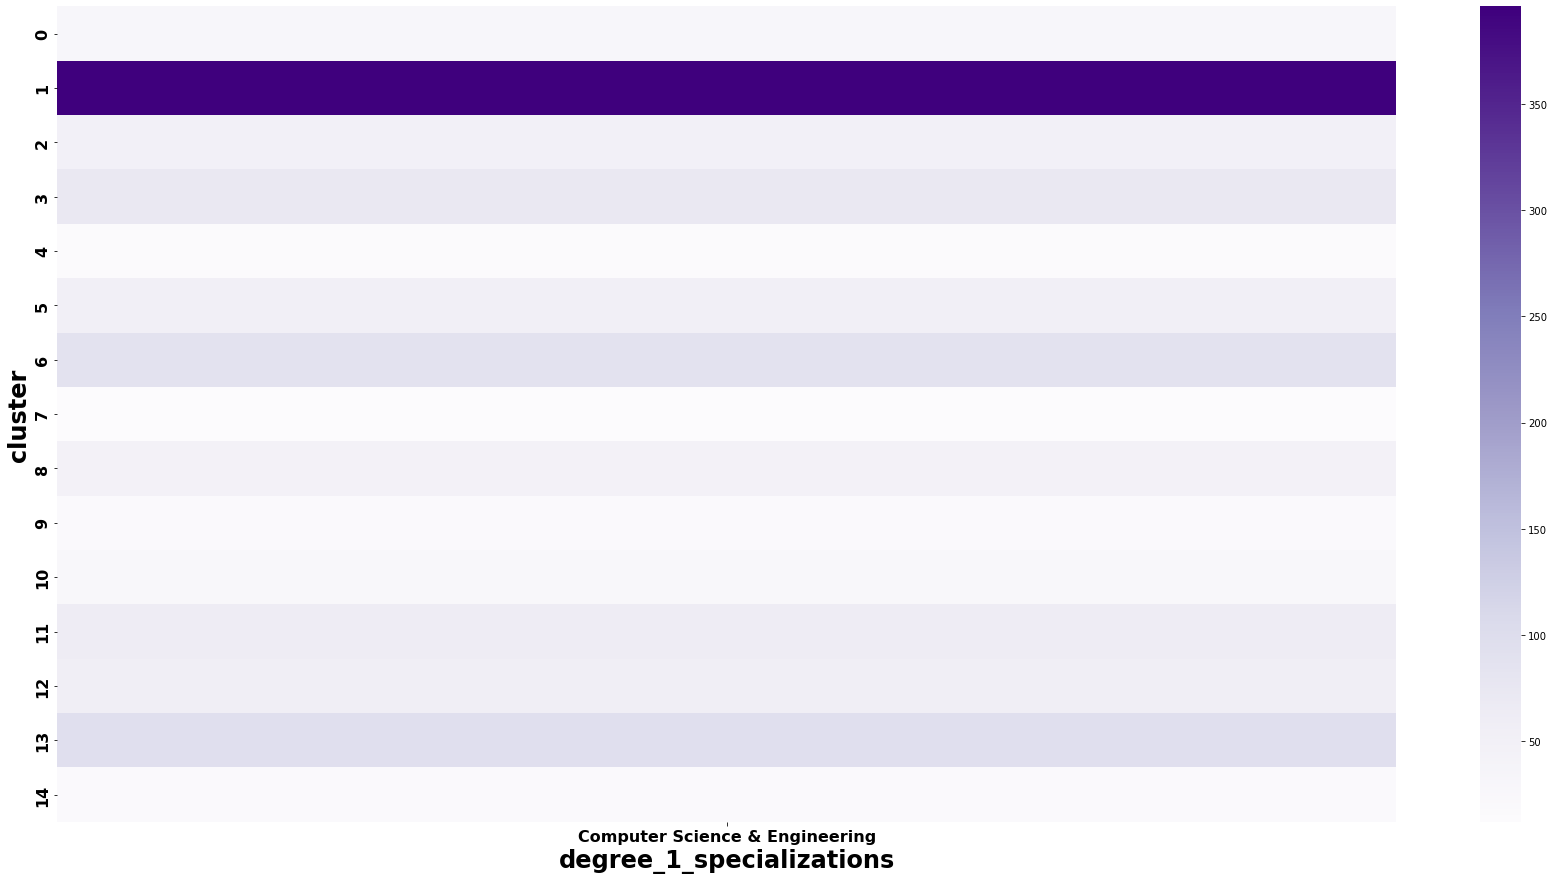

In [50]:
clusters = user_dataset.groupby(["cluster", "degree_1_specializations"]).size()
print(clusters)
fig, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'degree_1_specializations'), ax = ax, cmap = "Purples")
ax.set_xlabel('degree_1_specializations', fontdict = {'weight': 'bold', 'size': 24})
ax.set_ylabel("cluster", fontdict = {'weight': 'bold', 'size': 24})
for label in ax.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")  


#### Trying different k values 

In [51]:
#k_cluster_range is the values of k we will loop through (from 1 to 30 seems common)
k_cluster_range = range(1,30)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234).fit(X)
    inertia[i] = kmeans.inertia_

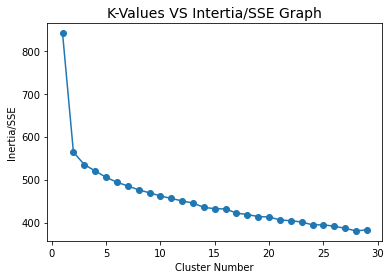

In [52]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
plt.show()
#save the plot
#plt.savefig('elbow_method.png')

Explained variance is 0.3771.


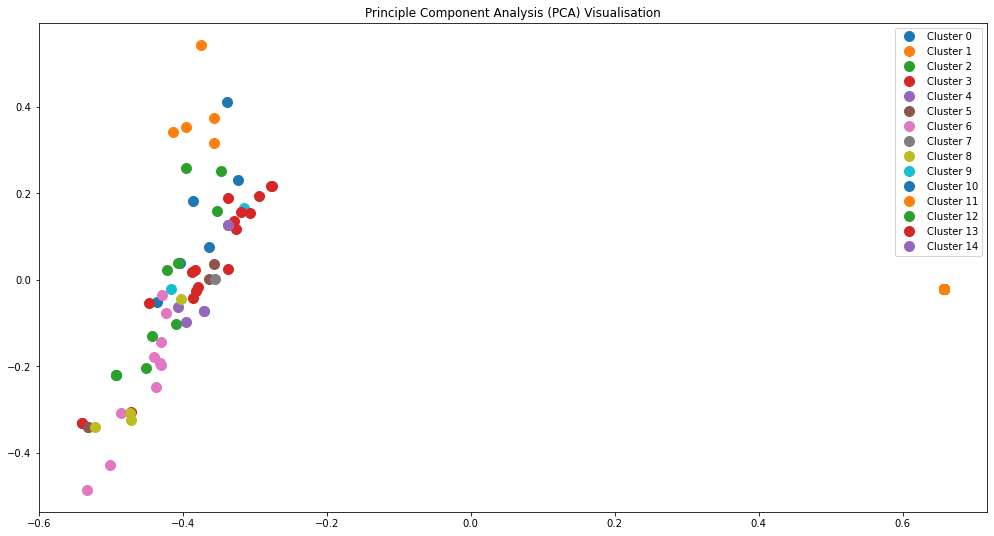

In [53]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=user_dataset['cluster'])) 
df_sample=df.sample(100)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()

### User Dataset -  Career Objective

In [54]:
vectorizer= TfidfVectorizer(stop_words=set([",", "--", "-", "#", "&", "-c-"]),tokenizer=tokenize, max_features=1000)
X=vectorizer.fit_transform(user_dataset["career_objective"])
print(X.shape)
word_features = vectorizer.get_feature_names()
#print(word_features)
print(len(word_features))
print(word_features[54])

(1042, 1000)
1000
acquir


In [55]:
kmeans = KMeans(n_clusters = 15, n_init = 10, random_state=1234)
kmeans.fit(X)
common_words=get_common_words(kmeans, 10)
#print(common_words)

In [56]:
cluster_words = []
all_clusters = []
cnt = 0

for i in common_words:
    for j in i:
        cluster_words.append(word_features[j])
        cnt=cnt+1
        if cnt == len(i):
            all_clusters.append(cluster_words)
            cluster_words=[]
            cnt = 0

print("Common words in Each Cluster")
index = 0
for i in all_clusters:
    print("Cluster ", index, "- ", " ".join(i))
    index=index+1

Common words in Each Cluster
Cluster  0 -  miss it esteem expertis experienc experi expect expand exist exhibit
Cluster  1 -  to a and with renown myself associ give firm perceiv
Cluster  2 -  i the compani to . can and work my in
Cluster  3 -  to organ the a and of my part be progress
Cluster  4 -  and in . to of data the a comput scienc
Cluster  5 -  to and . in a the my for learn be
Cluster  6 -  and to where can my work a i skill environ
Cluster  7 -  an to opportun the organ and provid with me grow
Cluster  8 -  to and the my as . of growth in best
Cluster  9 -  . and a develop i in with engin comput have
Cluster  10 -  to will me and background my allow . educ that
Cluster  11 -  the to posit my a i secur and organ skill
Cluster  12 -  and research comput student satisfi of at to strategi requir
Cluster  13 -  qualiti oper obtain high : a add resourc valu academ
Cluster  14 -  to a secur success fulli signific train make compani respons


In [57]:
user_dataset['cluster']=kmeans.labels_

cluster  degree_1
0        B.E.        575
1        B.E.         19
2        B.E.         35
3        B.E.         35
4        B.E.         45
5        B.E.         76
6        B.E.         40
7        B.E.         23
8        B.E.         51
9        B.E.         49
10       B.E.         21
11       B.E.         40
12       B.E.         11
13       B.E.          7
14       B.E.         15
dtype: int64


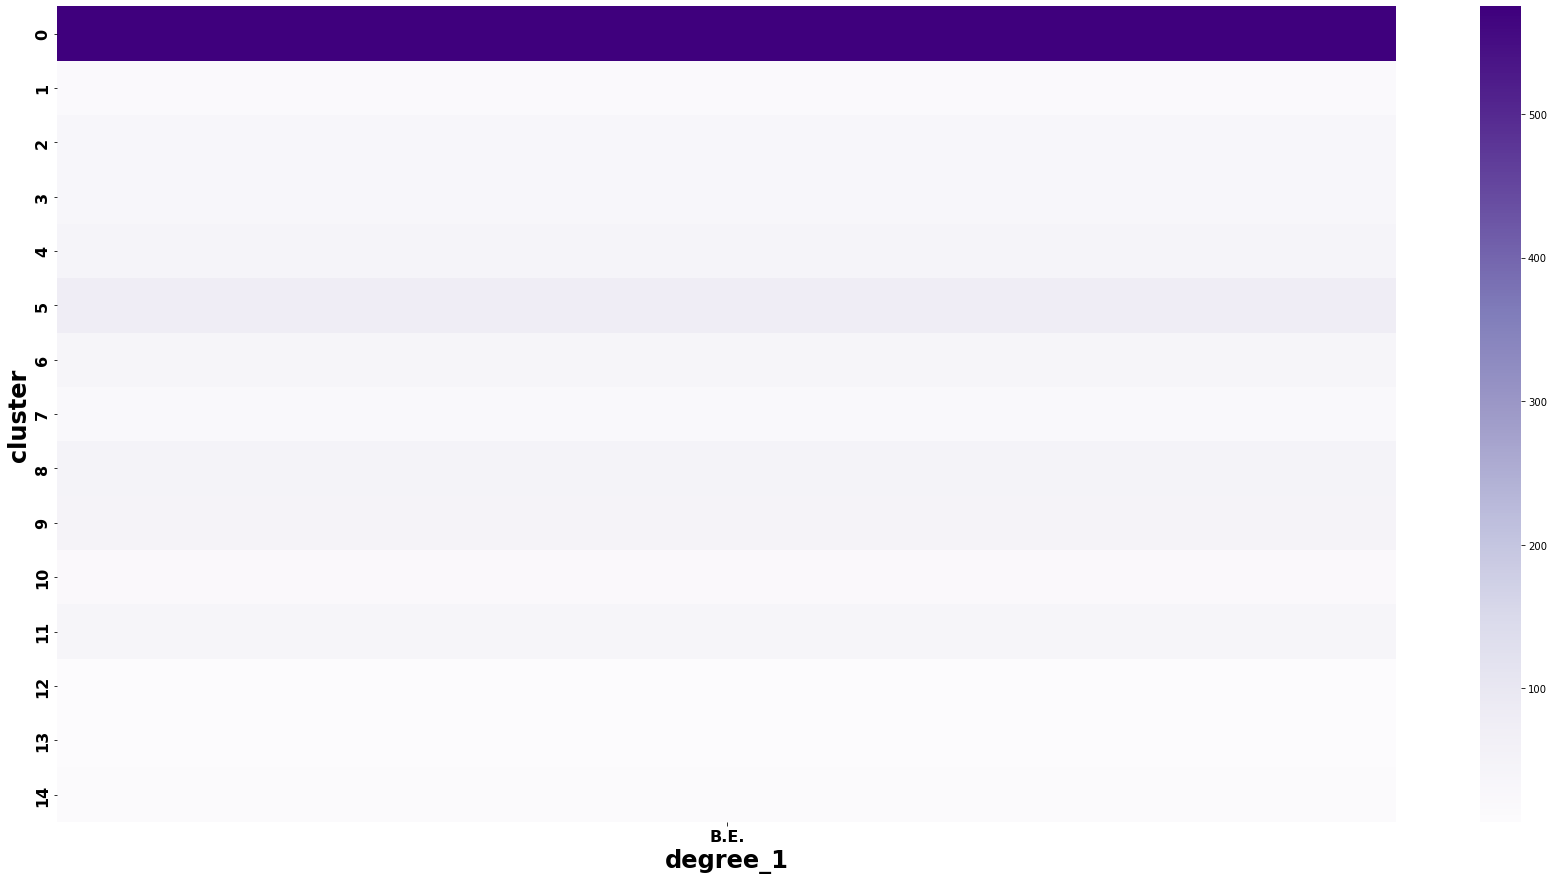

In [58]:
clusters = user_dataset.groupby(["cluster", "degree_1"]).size()
print(clusters)
fig, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'degree_1'), ax = ax, cmap = "Purples")
ax.set_xlabel('degree_1', fontdict = {'weight': 'bold', 'size': 24})
ax.set_ylabel("cluster", fontdict = {'weight': 'bold', 'size': 24})
for label in ax.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")  


cluster  degree_1_specializations      
0        Computer Science & Engineering    575
1        Computer Science & Engineering     19
2        Computer Science & Engineering     35
3        Computer Science & Engineering     35
4        Computer Science & Engineering     45
5        Computer Science & Engineering     76
6        Computer Science & Engineering     40
7        Computer Science & Engineering     23
8        Computer Science & Engineering     51
9        Computer Science & Engineering     49
10       Computer Science & Engineering     21
11       Computer Science & Engineering     40
12       Computer Science & Engineering     11
13       Computer Science & Engineering      7
14       Computer Science & Engineering     15
dtype: int64


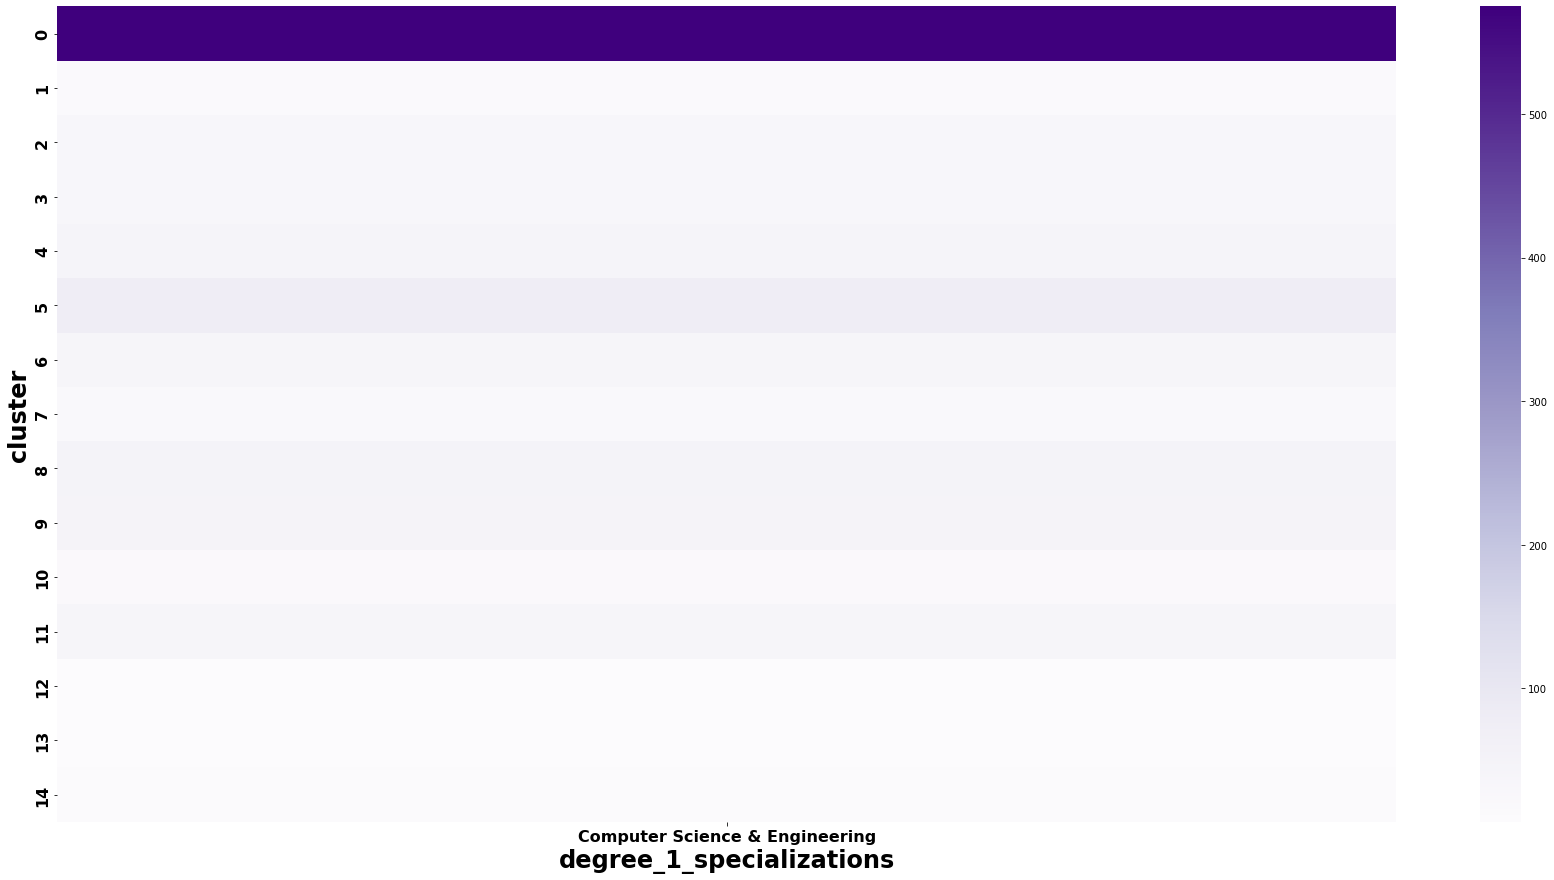

In [59]:
clusters = user_dataset.groupby(["cluster", "degree_1_specializations"]).size()
print(clusters)
fig, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'degree_1_specializations'), ax = ax, cmap = "Purples")
ax.set_xlabel('degree_1_specializations', fontdict = {'weight': 'bold', 'size': 24})
ax.set_ylabel("cluster", fontdict = {'weight': 'bold', 'size': 24})
for label in ax.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")  


#### Trying different k values 

In [60]:
#k_cluster_range is the values of k we will loop through (from 1 to 30 seems common)
k_cluster_range = range(1,30)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234).fit(X)
    inertia[i] = kmeans.inertia_

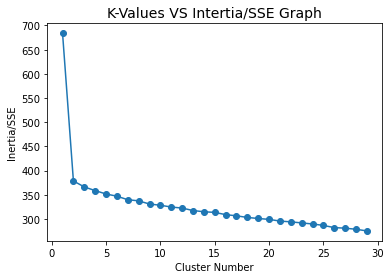

In [61]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
plt.show()
#save the plot
#plt.savefig('elbow_method.png')

Explained variance is 0.472.


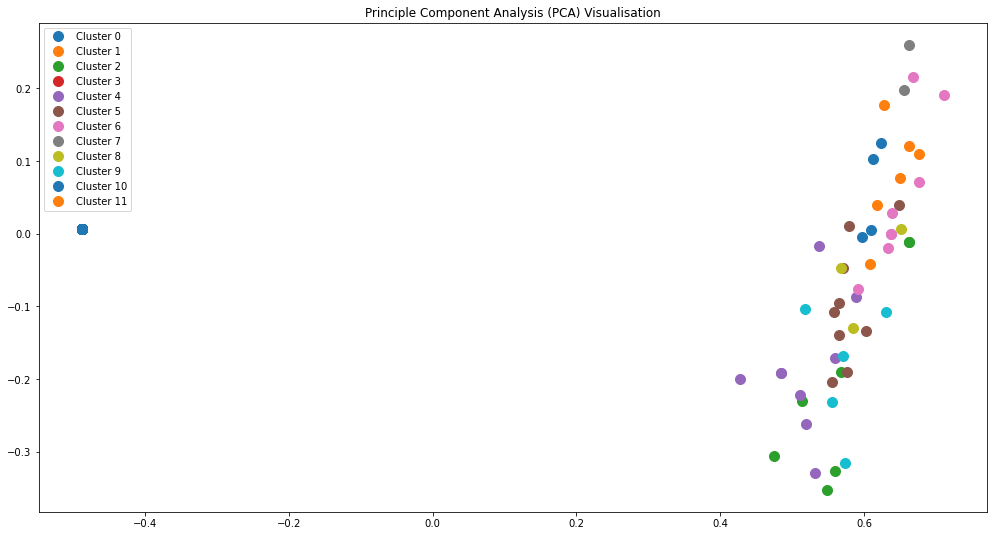

In [62]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=user_dataset['cluster'])) 
df_sample=df.sample(100)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()

### User Dataset -  Degree1 Specializations, Career Objective & Key Skills

In [63]:
comb_user_frame = user_dataset.degree_1_specializations.str.cat(" " + user_dataset.career_objective.str.cat(" " + user_dataset.key_skills_str))
comb_user_frame = comb_user_frame.replace({"[^A-Za-z0-9 ]+": ""}, regex=True)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comb_user_frame)
X.shape #(10,000 x 69)

(1042, 1755)

In [64]:
#other clustering 
#elbow method from https://github.com/ashishrana160796/online-course-recommendation-system/blob/master/elbow_test.py
k_cluster_range = range(1,31)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234, max_iter=100).fit(X)
    comb_user_frame["clusters"] = kmeans.labels_
    inertia[i] = kmeans.inertia_

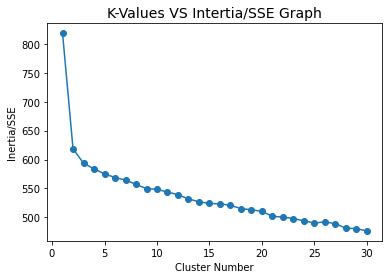

In [65]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
plt.show()
#save the plot
#plt.savefig('elbow_method.png')

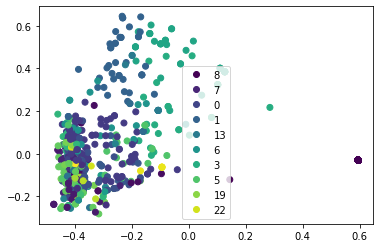

In [66]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())
df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=comb_user_frame["clusters"]))

plot = plt.scatter(df.x, df.y, c=df.label)
plt.legend(handles=plot.legend_elements()[0], labels=list(df["label"].unique()))
plt.show()

Explained variance is 0.2905.


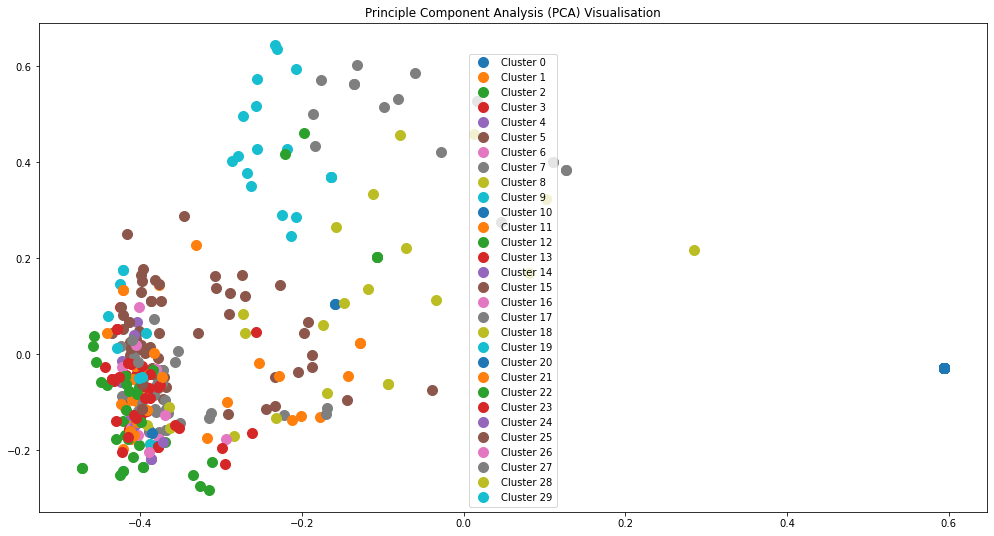

In [67]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=comb_user_frame["clusters"])) 
df_sample=df.sample(500)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()

## Collaborative Filtering

## Content Based Filtering

In [68]:
#https://github.com/ry05/couReco/blob/master/recommender.py